# DC Motor with Current Control

## Motor Shaft Model

The model of a DC motor is shown below:

<img width="75%" src="figures/DCMotorBook.jpg" alt="DC motor diagram from book"/>

We will simplify this and imagine that we can directly control current input. The free-body diagram of the motor shaft with this simplification is shown below.

<img width="33%" src="figures/DCMotorShaft.png" alt="Motor shaft FBD"/>


where $J$ is the inertia of the shaft and $b$ is the coefficient of viscous damping/friction.

Summing moments about the motor shaft gives us:

$T_m-b\omega(t)=J\dot{\omega}(t)$

Remember that the force applied by viscous damping is always a function of velocity in the opposite direction of the motion. Motor torque, $T_m$ is a function of the armature current input:

$T_m=Ki(t)$ 

where $K$ is the motor torque constant. This can be rearranged to get the equation of motion in standard form.

$J\dot{\omega}(t) + b \omega(t) = Ki(t)$

From here, we can get the transfer function with $\omega$ as the output and $i$ as the input. Assuming initial conditions are zero, the Laplace transform of the equation of motion is:

$Js\omega(s) + b\omega(s) = Ki(s)$

Since $\omega$ was an unknown function of time, the Laplace transform converts it to an unknown function of the Laplace variable $s$.

Once we have the Laplace transform, we can rearrange it to give us our transfer function of $\frac{\omega(s)}{i(s)}=\frac{output}{input}$. A little algebra results in:

$\frac{\omega(s)}{i(s)}=\frac{K}{Js+b}$

Now let's get on to the fun part. ***Coding!***

## Step Input in Current

Start by importing the necessary modules and packages.

In [1]:
import numpy as np # general math/array operations package
import control # name should be self explanatory
import matplotlib.pyplot as plt # plotting library

Next, we need to define some parameters for the system so we can evaluate it. We'll use arbitrary parameters for now.

In [2]:
J = 5 # motor shaft angular inertia
b = 1 # viscous friction coefficient
K = 20 # motor torque constant

We need to also translate our symbolic transfer function into something that python can understand. The numerator and denominator of the transfer function must be defined as 1-D arrays.

In [3]:
num = [K]    # numerator
den = [J, b] # denominator

Define the transfer function by passing `num` and `den` to the tf() function in the `control` library. From there we can easily generate the pole-zero plot in the s-plane and a step response.

In [4]:
# Define the transfer function form of the system defined by num and den
sys = control.tf(num, den)

poles, zeros = control.pzmap(sys)

FileNotFoundError: missing font metrics file: pncr7t

<Figure size 432x288 with 1 Axes>

We get exactly one pole for this system. That makes sense because the numerator was a constant and therefore cannot have roots (can't be zero). The denominator was a first order polynomial of $s$ and therefore can only have one root.

In [5]:
time = np.arange(0,20,0.1) # time samples from 0 to 20 seconds with time spacing of 0.05 seconds

t, xout = control.step_response(sys,T=time)

In [7]:
#############################################################
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units font
plt.setp(ax.get_ymajorticklabels(),fontsize=18)
plt.setp(ax.get_xmajorticklabels(),fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Velocity (rad/s)', fontsize=22, weight='bold', labelpad=10)

plt.plot(time, xout, linewidth=2, linestyle='-', label=r'Response')
# uncomment below and set limits if needed
# plt.xlim(0,5)
# plt.ylim(-0.01,2.5)

# # Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True, )
# ltext  = leg.get_texts()
# plt.setp(ltext,fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('plot_filename.pdf')

# plt.show()

FileNotFoundError: missing font metrics file: pncr7t

<Figure size 432x288 with 1 Axes>

This plot represents a step change in current input from $0$ to $1$ amp. Because the system only has real poles, the response asymptotically approaches the steady state output without oscillating. Using a step in current input does not allow us to make the motor go to any desired angular velocity.

## Proportional-Integral Control

Instead of using a step response in current input, we can use a PI (proportional-integral) controller to make current input a function of desired velocity. If we say that $i(s)=k_p (\omega_d(s) - \omega(s)) + \frac{1}{s}k_I(\omega_d(s)-\omega(s))$, then the transfer function becomes:

$\frac{\omega(s)}{\omega_d(s)}=\frac{K k_p s + K k_I}{Js^2 + (b+K k_p)s + K k_I}$

where the output is actual angular velocity, $\omega$, and the input is desired angular velocity, $\omega_d$.
The pole-zero plot and step response of the system can be evaluated again. This time the step response repesents a change in desired velocity from $0$ to $1$ rad/s.

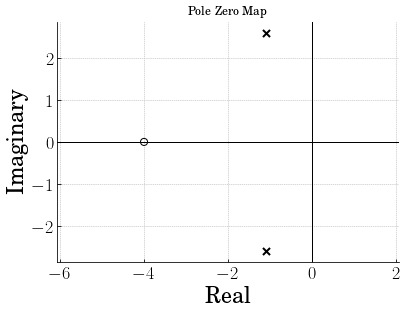

In [ ]:
# arbitrarily assign proportional and integral gain
kp = 0.5 # proportional gain
kI = 2 # integral gain

num_p = [K*kp, K*kI]
den_p = [J, b+K*kp, K*kI]

sys_p = control.tf(num_p,den_p)

poles_p, zeros_p = control.pzmap(sys_p)

You'll notice that now there are two complex conjugate poles, that means we should expect that there will be some oscillation in the response now. We can plot the time response to a step input to confirm.

In [ ]:
time = np.arange(0,20,0.01) # time samples from 0 to 20 seconds with time spacing of 0.05 seconds

t, response_p_gain = control.step_response(sys_p,T=time)

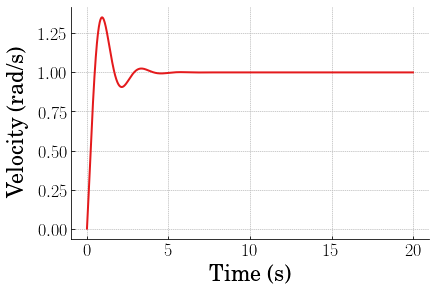

In [ ]:
#############################################################
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units font
plt.setp(ax.get_ymajorticklabels(),fontsize=18)
plt.setp(ax.get_xmajorticklabels(),fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Velocity (rad/s)', fontsize=22, weight='bold', labelpad=10)

plt.plot(time, response_p_gain, linewidth=2, linestyle='-', label=r'Response')
# uncomment below and set limits if needed
# plt.xlim(0,5)
# plt.ylim(-0.01,2.5)

# # Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True, )
# ltext  = leg.get_texts()
# plt.setp(ltext,fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('plot_filename.pdf')

# plt.show()

So the time response shows that there is some overshoot and oscillation now that we've added the PI controller. The motor speed also successfully made it to the desired angular velocity (step input in desired motor speed was 0 to 1 rad/s).